<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/hydrogen/transportOfHydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Transport of hydrogen
#@markdown This page will give an introduction to transport of hydrogen.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

#Litterature

https://www.equinor.com/en/what-we-do/hydrogen.html

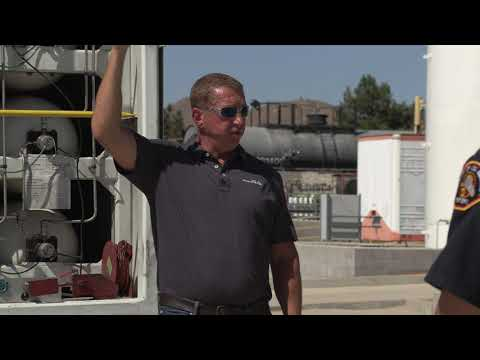

In [2]:
#@title Introduction to transport of hydrogen
from IPython.display import YouTubeVideo
YouTubeVideo('LsYq9jRkXsg', width=600, height=400)

#Pipeline transport of hydrogen

In [3]:
from neqsim.thermo import fluid, TPflash

fluid1 = fluid('pr')
fluid1.addComponent('hydrogen', 1.0)
fluid1.addComponent('methane', 0.0)
fluid1.setPressure(1.01325, 'bara')
fluid1.setTemperature(20.0, 'C')

TPflash(fluid1);
fluid1.initProperties()
print('buble point temperature', fluid1.getTemperature('C'), " at ", fluid1.getPressure(), " bara")
print('gas density ', fluid1.getPhase('gas').getDensity())
print('density ', fluid1.getDensity())

method = "friction theory"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)

buble point temperature 20.0  at  1.01325  bara
gas density  0.08378487036468386
density  0.08378487036468386


# Compression of hydrogen

In [4]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash, createfluid2
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess, compressor,heater

pressureExport = 150.0 #@param {type:"number"}
temperatureExport = 35.0 #@param {type:"number"}

clearProcess()
stream1 = stream(fluid1)

stream1.setFlowRate(10.0, "MSm3/day")
stream1.setTemperature(20.15, "C")
stream1.setPressure(90.0, "bara")

compressor_1 = compressor(stream1, 120.0)
compressor_1.setIsentropicEfficiency(0.77)
coolerMP1 = heater(compressor_1.getOutStream())
coolerMP1.setOutTemperature(20.0+273.15)
compressor_2 = compressor(coolerMP1.getOutStream(), pressureExport)
compressor_2.setIsentropicEfficiency(0.77)
coolerExport = heater(compressor_2.getOutStream())
coolerExport.setOutTemperature(temperatureExport+273.15)
runProcess()

print("compressor1 power ", compressor_1.getPower()/1e6, " MW")
print("compressor2 power ", compressor_2.getPower()/1e6, " MW")

print("cooler1 duty ", coolerMP1.getDuty()/1e6, " MW")
print("cooler2 duty ", coolerExport.getDuty()/1e6, " MW")

compressor1 power  4.82133087501536  MW
compressor2 power  3.749130786168436  MW
cooler1 duty  -4.819866567475494  MW
cooler2 duty  -1.54186797840459  MW


In [5]:
printFrame(coolerExport.getOutStream().getFluid())

| 0                  | 1          | 2           | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:------------|:----|:----|:----|:----------------|
|                    | total      | gas         |     |     |     |                 |
| hydrogen           | 1E0        | 1E0         |     |     |     | [mole fraction] |
| methane            | 0E0        | 0E0         |     |     |     | [mole fraction] |
|                    |            |             |     |     |     |                 |
| Density            |            | 1.08551E1   |     |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0         |     |     |     | [mole fraction] |
| MolarMass          | 2.016E0    | 2.016E0     |     |     |     | [kg/kmol]       |
| Z factor           |            | 1.05603E0   |     |     |     | [-]             |
| Heat Capacity (Cp) |            | 1.46332E1   |     |     |     | [kJ/kg*K]       |
| Heat Capacity (Cv) |            | 1.01772E1   |     

# Transport of hydrogen in pipeline

In [6]:
diameter = [0.98, 0.98] #meter
roughnes = [5.0e-6, 5.0e-6] #meter
position = [0.0, 5000.0] #meter
height = [0.0, 0.0] #meter
outtemperatures =[278.15, 278.15] #Kelvin
outHeatU = [25.0, 25.0] #W/m2K
wallHeatU = [35.0, 35.0] #W/m2K

print(coolerExport.getOutStream().getFlowRate('MSm3/day'))

clearProcess()
pipe1 = pipeline(stream1, position, diameter, height, outtemperatures, roughnes,outHeatU,wallHeatU)
pipe1.setNumberOfNodesInLeg(100)
runProcess()

numberofnodes = pipe1.getPipe().getTotalNumberOfNodes()

print('number of nodes ' , numberofnodes)
print('outlet pressure ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getPressure('bara'))
print('outlet temperature ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getTemperature('C'))

10.0
number of nodes  102
outlet pressure  89.9975750071697
outlet temperature  8.551217297561834


pressure out of pipeline  90.0 [bara]
| 0                  | 1          | 2                  | 3                  | 4   | 5   | 6               |
|:-------------------|:-----------|:-------------------|:-------------------|:----|:----|:----------------|
|                    | total      | gas                | oil                |     |     |                 |
| hydrogen           | 1E0        | 1E0                | 1E0                |     |     | [mole fraction] |
| methane            | 0E0        | 0E0                | 0E0                |     |     | [mole fraction] |
|                    |            |                    |                    |     |     |                 |
| Density            |            | 7.08314E0          | 7.08314E0          |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0                | 1E0                |     |     | [mole fraction] |
| MolarMass          | 2.016E0    | 2.016E0            | 2.016E0            |     |     | [kg/kmol

Text(0, 0.5, 'Temperature [C]')

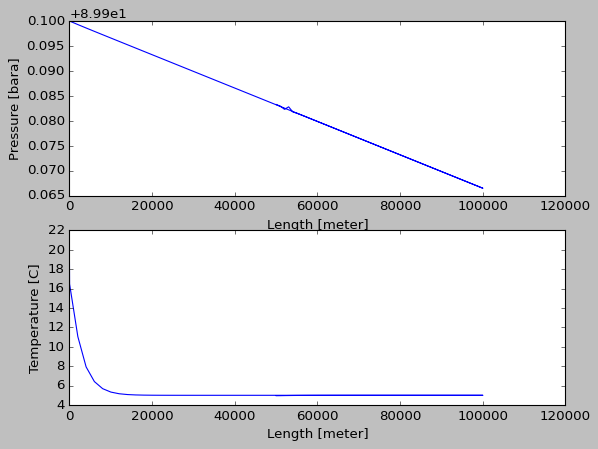

In [8]:
diameter = [1.0, 1.0, 1.0]
roughness = [15.0e-6, 15.0e-6, 15.0e-6]
position = [0.0, 100000.0, 50000.0]
elevation = [0.0, 0.0, 0.0]
outtemperatures =[278.15, 278.15, 278.15]
outHeatU = [15.0, 15.0, 15.0]
wallHeatU = [15.0, 15.0, 15.0]

clearProcess()
stream1 = stream(fluid1)
pipe1 = pipeline(stream1, position, diameter, elevation, outtemperatures, roughness, outHeatU,wallHeatU)
runProcess()

print('pressure out of pipeline ', pipe1.getOutStream().getFluid().getPressure('bara'), '[bara]')
printFrame(pipe1.getOutStream().getFluid())

length = []
pressure = []
temperature = []
lengthtot = 0.0
for i in range(pipe1.getPipe().getTotalNumberOfNodes()):
  length.append(lengthtot);
  lengthtot = lengthtot+pipe1.getPipe().getNode(i).getLengthOfNode()
  pressure.append(pipe1.getPipe().getNode(i).getBulkSystem().getPressure('bara'))
  temperature.append(pipe1.getPipe().getNode(i).getBulkSystem().getTemperature('C'))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(length, pressure)
plt.xlabel('Length [meter]')
plt.ylabel('Pressure [bara]')
plt.subplot(2, 1, 2)
plt.plot(length, temperature)
plt.xlabel('Length [meter]')
plt.ylabel('Temperature [C]')